<a href="https://colab.research.google.com/github/sury1999/Data-Science-Projects/blob/main/Gold_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARIMA MODEL 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pmdarima
from pmdarima.arima import auto_arima
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 6

In [2]:
#! pip install pmdarima

In [3]:
df = pd.read_csv('/content/goldx.csv')

In [4]:
df.head()

,Date,Price,Open,High,Low
0,"Aug 01, 2018",1216.6,1223.4,1223.4,1216.2
1,"Jul 31, 2018",1223.7,1220.4,1228.1,1213.0
2,"Jul 30, 2018",1221.3,1222.5,1223.9,1218.1
3,"Jul 27, 2018",1222.2,1223.5,1226.8,1216.7
4,"Jul 26, 2018",1225.3,1227.8,1227.8,1227.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9771 entries, 0 to 9770
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9771 non-null   object 
 1   Price   9771 non-null   float64
 2   Open    9771 non-null   float64
 3   High    9771 non-null   float64
 4   Low     9771 non-null   float64
dtypes: float64(4), object(1)
memory usage: 381.8+ KB


Dropping Open, Low and High for ease of use

In [6]:
df = df.drop(['Open', 'Low', 'High'], axis=1)
df.head()

,Date,Price
0,"Aug 01, 2018",1216.6
1,"Jul 31, 2018",1223.7
2,"Jul 30, 2018",1221.3
3,"Jul 27, 2018",1222.2
4,"Jul 26, 2018",1225.3


In [7]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
dataset = df.set_index(['Date'])
dataset.head(5)

,Price
Date,
2018-08-01,1216.6
2018-07-31,1223.7
2018-07-30,1221.3
2018-07-27,1222.2
2018-07-26,1225.3


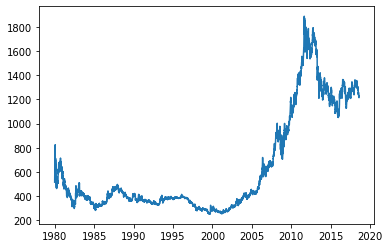

In [8]:
plt.plot(dataset)
plt.show()

In [9]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(dataset)

(0.9202215715411978, True)

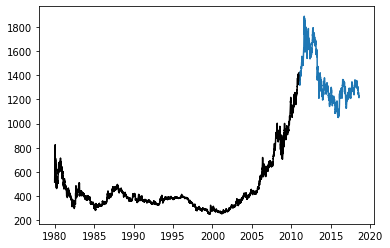

In [10]:
train = dataset[-7817:]
test = dataset[:1954]
plt.plot(train, color='black')
plt.plot(test)
plt.show()

In [11]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=1, max_q=1, 
                         start_P=0, D=1, start_Q=0, max_P=1, max_D=1, max_Q=1,
                         m=12, seasonal=True, error_action='warn', trace=True,
                         surpress_warnings=True, stepwise=True, random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=57989.986, Time=0.41 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=55475.990, Time=3.92 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=13.82 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=57991.004, Time=0.37 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=16.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=11.36 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=55474.310, Time=2.73 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=10.63 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=5.95 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=55475.997, Time=4.00 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=55477.300, Time=8.25 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=55476.218, Time=7.25 sec

Best model:  ARIMA(0,1,0)(1,1,0)[12]          
Total fit time: 84.825 seconds


In [12]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 7817
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood              -27735.155
Date:                            Sat, 10 Jul 2021   AIC                          55474.310
Time:                                    18:55:38   BIC                          55488.235
Sample:                                         0   HQIC                         55479.082
                                           - 7817                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5373      0.004   -127.241      0.000      -0.546      -0.529
sigma2        71.4883      0.380    188.204      0.000      70.744      72.233
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):             87160.03
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
prediction = pd.DataFrame(arima_model.predict(n_periods=1954), index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Date,
2018-08-01,483.671515
2018-07-31,495.745655
2018-07-30,439.380100
2018-07-27,437.462221
2018-07-26,464.335048
...,...
2011-02-01,-18524.219508
2011-01-31,-18531.751682
2011-01-28,-18467.676319


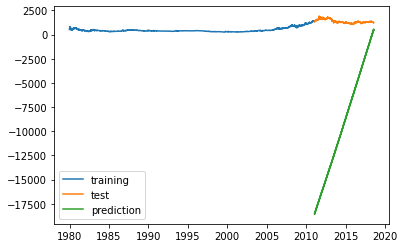

In [14]:
plt.plot(train, label='training')
plt.plot(test, label='test')
plt.plot(prediction, label='prediction')
plt.legend()
plt.show()

# New Section

In [ ]:
mean_rol = dataset.rolling(window=12).mean()
mean_std = dataset.rolling(window=12).std()


In [ ]:
og = plt.plot(dataset, color='blue', label='Original')
mean_plot = plt.plot(mean_rol, color='brown', label='Rolling Mean')
std_plot = plt.plot(mean_std, color='black', label='Rolling Std')
plt.legend()
plt.show()

ADF test

In [ ]:
adftest = adfuller(dataset['Price'])
adfoutput = pd.Series(adftest[0:4], index=['Test Stat', 'pvalue', 'usedlag', 'number of observations'])
for key, value in adftest[4].items():
  adfoutput['Critical Value (%s)'%key] = value
adfoutput['icbest'] = adftest[5]
print(adfoutput)

Function for ADF values

In [ ]:
def adf_values(series):
  avg = series.rolling(window=12).mean()
  std = series.rolling(window=12).std()

  og = plt.plot(series, color='blue', label='Original')
  mean_plot = plt.plot(avg, color='brown', label='Rolling Mean')
  std_plot = plt.plot(std, color='black', label='Rolling Std')
  plt.legend()
  plt.show()

  adftest = adfuller(series, autolag='AIC')
  adfoutput = pd.Series(adftest[0:4], index=['Test Stat', 'pvalue', 'usedlag', 'number of observations'])
  for key, value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  adfoutput['icbest'] = adftest[5]
  print(adfoutput)

In [ ]:
test = pmdarima.arima.PPTest() 
test.should_diff(dataset)

Differencing Data to Make it Stationary

In [ ]:
def difference(dataset, interval=1):
    index = list(dataset.index)
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset["Price"][i] - dataset["Price"][i - interval]
        diff.append(value)
    return pd.DataFrame(diff)

In [ ]:
diff1 = difference(dataset)
plt.plot(diff1)
plt.show()

Log Transforming Data to Make it stationary

In [ ]:
ts_log = np.log(dataset)
plt.title('Log of the data')
plt.plot(ts_log)
plt.show()

In [ ]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='black')
plt.plot(movingSTD, color='black')
plt.plot(movingAverage, color='red')
plt.show()

In [ ]:
indexedDataset_logScale.dropna(inplace=True)
indexedDataset_logScale.head()

In [ ]:
results1 = pmdarima.arima.CHTest(m=12).estimate_seasonal_differencing_term(indexedDataset_logScale)
results1

In [ ]:
adf_values(indexedDataset_logScale)

In [ ]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

In [ ]:
results2 = pmdarima.arima.CHTest(m=12).estimate_seasonal_differencing_term(datasetLogScaleMinusMovingAverage)
results2

In [ ]:
adf_values(datasetLogScaleMinusMovingAverage)

Using automated Differencing

In [ ]:
diffauto1 = datasetLogScaleMinusMovingAverage.diff()
plt.plot(diffauto1)
plt.show()

In [ ]:
diffauto1.dropna(inplace=True)
diffauto1.head()

In [ ]:
adf_values(diffauto1['Price'])

In [ ]:
val1 = diffauto1.values
mean1 = val1.mean()
std1 = val1.std()
print(mean1, std1)

In [ ]:
test.should_diff(diffauto1)

In [ ]:
adf_values(diffauto1)

2nd Differencing

In [ ]:
diffauto2 = diffauto1.diff()
plt.plot(diffauto2)
plt.show()

In [ ]:
val2 = diffauto2.values
mean2 = val2.mean()
std2 = val2.std()
print(mean2, std2)

In [ ]:
diffauto2.dropna(inplace=True)
diffauto2.head()

In [ ]:
adf_values(diffauto2['Price'])

In [ ]:
test.should_diff(diffauto2)

3rd Differencing

In [ ]:
diffauto3 = diffauto2.diff()
plt.plot(diffauto3)
plt.show()

In [ ]:
diffauto3.dropna(inplace=True)
diffauto3.head()

In [ ]:
adf_values(diffauto3['Price'])